In [427]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.10f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 

# Carga

In [428]:
vixCasa = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixCasas.csv' , encoding='utf-16', sep='|')

In [429]:
vixApp = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixApartamentos.csv' , encoding='utf-16', sep='|')

In [430]:
df = pd.concat([vixCasa, vixApp], ignore_index=True)

In [431]:
df = df.drop_duplicates(subset=(['Codigo']))

# Tratamento de dados

### Alterando tipo de dados

In [432]:
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

In [433]:
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [434]:
df['Quartos'] = df['Quartos'].map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Banheiros'] = df['Banheiros'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Vagas na garagem'] = df['Vagas na garagem'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))

In [435]:
df.drop(['Link','Descricao','Área útil' , 'Área construída', 'Page' ,'Detalhes do imóvel', 'Condomínio', 'IPTU',
       'Detalhes do condominio', 'Logradouro','CEP', 'Município', 'Codigo'] , axis=1, inplace=True)

In [436]:
df = df[df['Banheiros'] >0]
df = df[df['Quartos'] >0]

### Análise e remoção de outliers

In [437]:
def fncCalculaLimites(x):
    return x.quantile(0.75) + x.std()*1.5 , x.quantile(0.25) - x.std()*1.5 

##### Valor

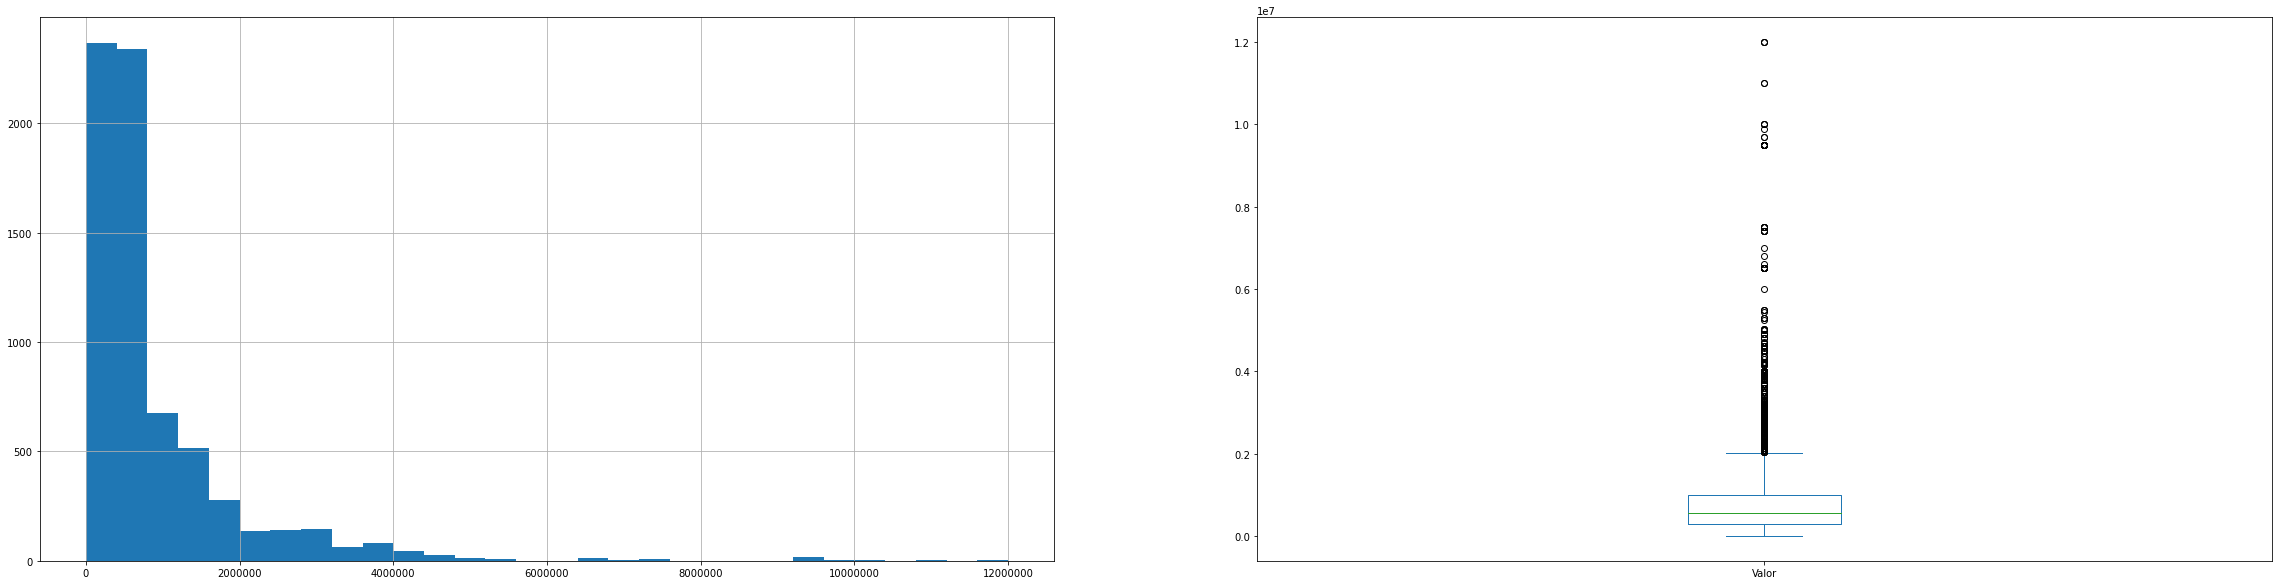

In [438]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

In [439]:
fncCalculaLimites(np.log2(df[df['Valor']>0]['Valor']))

(22.73632578144708, 15.375346193339947)

<AxesSubplot:>

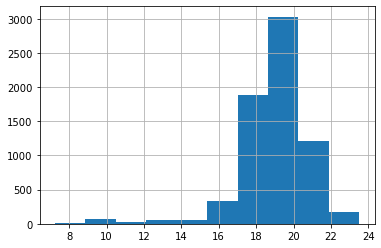

In [440]:
np.log2(df[df['Valor']>0]['Valor']).hist()

In [441]:
df[df['Valor']<=42000]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,Area
33,"20,000.0000000000",Casas,Venda - casa em rua pública,2,2,1,Goiabeiras,200.0000000000
92,"9,000.0000000000",Casas,Venda - casa em rua pública,5,5,1,Praia do Canto,194.0000000000
124,"25,000.0000000000",Casas,Venda - casa em rua pública,3,2,0,Santa Cecília,NaN
130,0.0000000000,Casas,Venda - casa em rua pública,2,2,2,Centro,NaN
218,"5,000.0000000000",Casas,Venda - casa em rua pública,2,2,0,São Pedro,NaN
...,...,...,...,...,...,...,...,...
6823,"1,250.0000000000",Apartamentos,Venda - apartamento padrão,1,1,0,Centro,80.0000000000
6950,800.0000000000,Apartamentos,Venda - apartamento padrão,4,3,2,Jardim Camburi,NaN
7080,0.0000000000,Apartamentos,Venda - apartamento padrão,3,2,2,Santa Lúcia,0.0000000000
7101,0.0000000000,Apartamentos,Venda - apartamento padrão,2,1,1,Centro,0.0000000000


In [442]:
df = df[(df['Valor']>42000) & (df['Valor']<=7000000)]

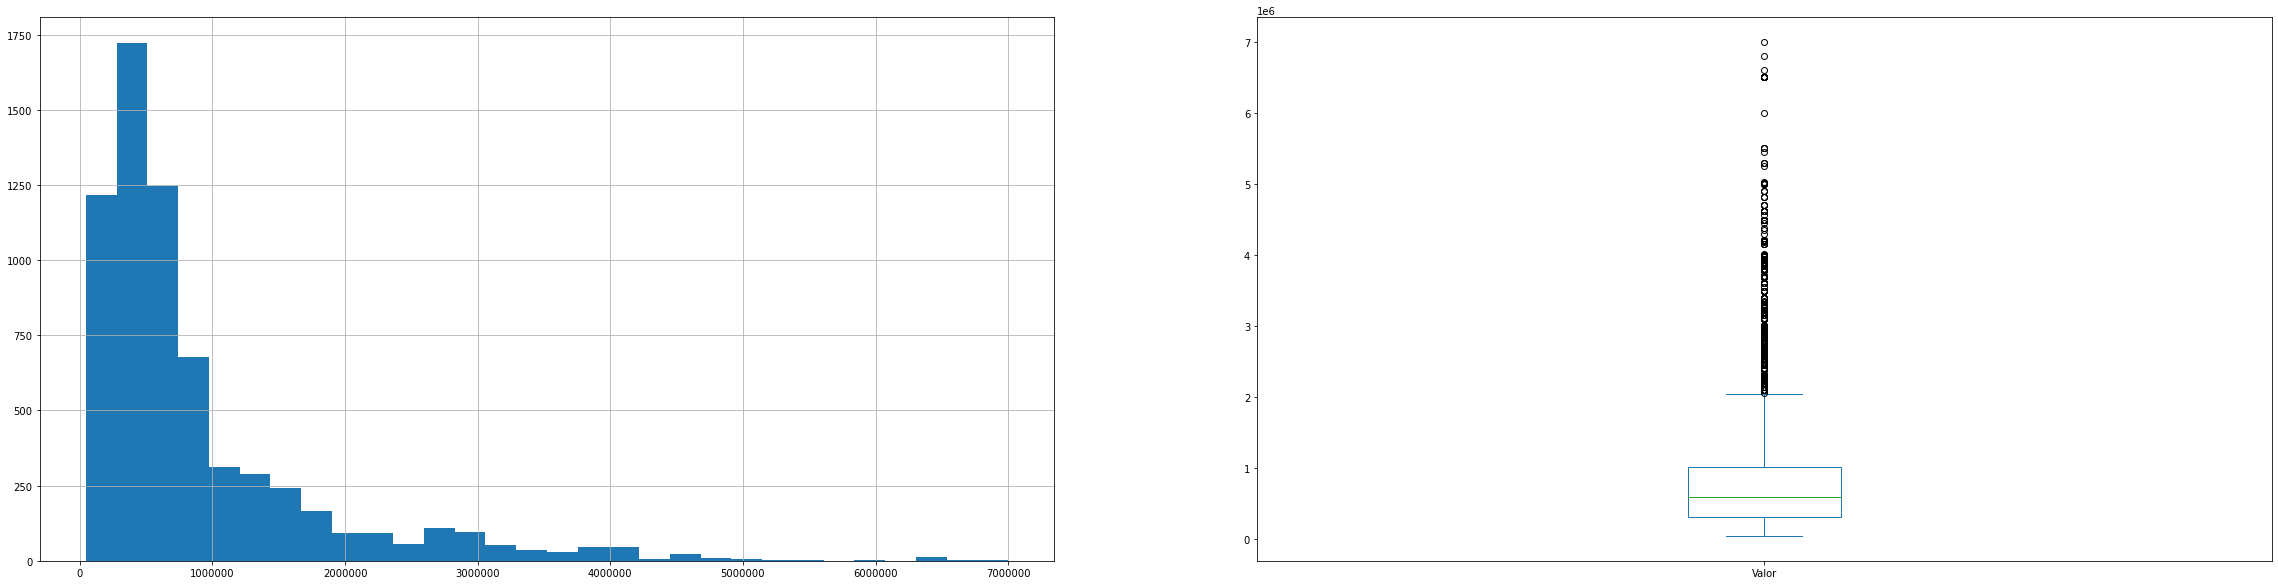

In [443]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

##### Area

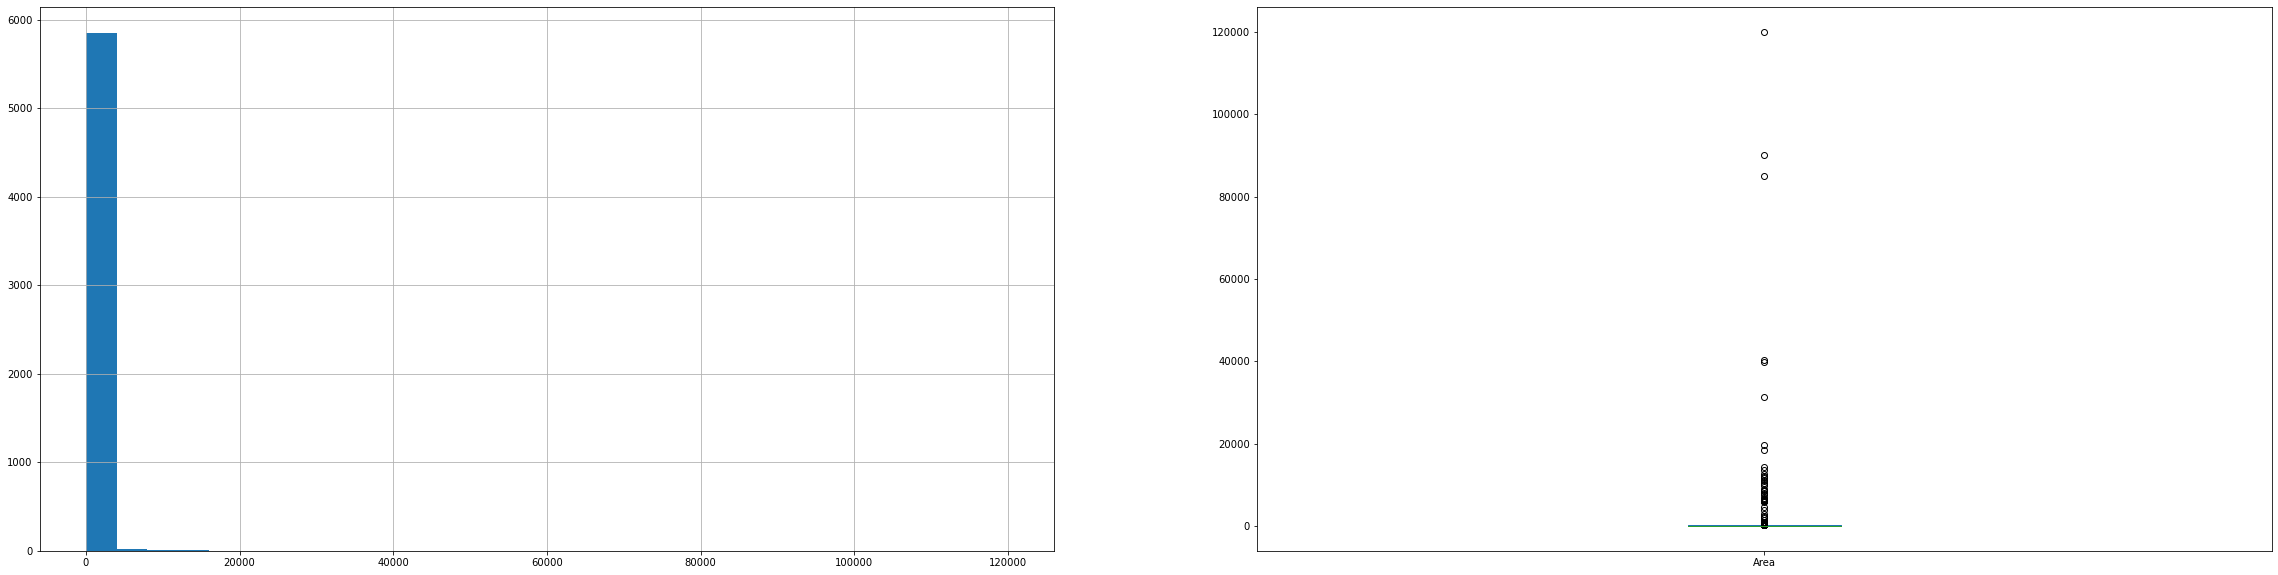

In [444]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

In [445]:
# Temos 341 itens com area 0 e podemos considerar erros de preenchimento
df[df['Area']<30]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,Area
1,"400,000.0000000000",Casas,Venda - casa em rua pública,3,2,2,Goiabeiras,0.0000000000
20,"265,000.0000000000",Casas,Venda - casa em rua pública,2,2,1,Jucutuquara,0.0000000000
39,"250,000.0000000000",Casas,Venda - casa em rua pública,3,2,2,Gurigica,0.0000000000
52,"190,000.0000000000",Casas,Venda - casa em rua pública,3,4,2,Jucutuquara,0.0000000000
76,"270,000.0000000000",Casas,Venda - casa em rua pública,3,2,1,Goiabeiras,0.0000000000
...,...,...,...,...,...,...,...,...
7296,"782,000.0000000000",Apartamentos,Venda - apartamento padrão,3,3,2,Santa Luíza,0.0000000000
7342,"779,004.0000000000",Apartamentos,Venda - apartamento padrão,3,2,2,Barro Vermelho,0.0000000000
7344,"780,010.0000000000",Apartamentos,Venda - apartamento padrão,3,3,2,Santa Luíza,0.0000000000
7375,"780,000.0000000000",Apartamentos,Venda - apartamento padrão,3,3,2,Santa Luíza,0.0000000000


In [446]:
# Removendo valores com erro de preenchimento
df= df[df['Area']>30]

In [447]:
max , min = fncCalculaLimites(df['Area'])
[max, min]

[3989.322230295752, -3754.322230295752]

In [448]:
max , min = fncCalculaLimites(df['Area'])
df = df[(df['Area'] > min) & (df['Area'] < max)]

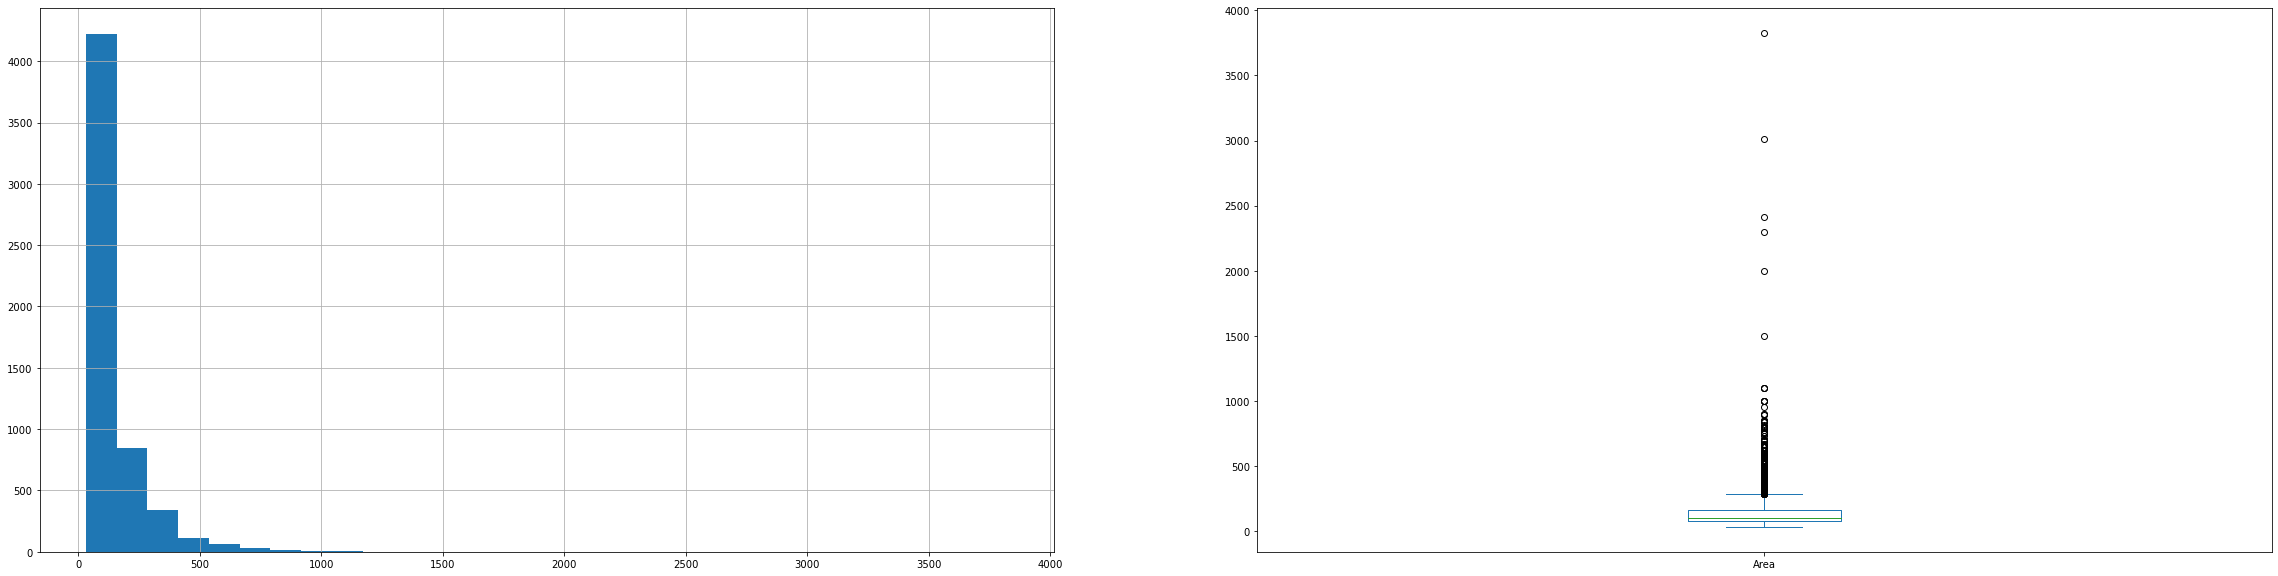

In [449]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

### Campos descritivos

##### Bairros

In [450]:
df['Bairro'].value_counts()

Jardim Camburi       1780
Jardim da Penha       630
Praia do Canto        539
Mata da Praia         412
Bento Ferreira        356
                     ... 
Estrelinha              1
Fonte Grande            1
Jesus de Nazareth       1
Andorinhas              1
Nazareth                1
Name: Bairro, Length: 72, dtype: int64

In [451]:
regioes ={
 'Itararé':  'Maruípe' ,
 'Santa Lúcia':  'Zona Leste' ,
 'Jardim Camburi': 'Jardim Camburi'  ,
 'Goiabeiras':  'Zona Norte' ,
 'Santa Helena':  'Zona Leste' ,
 'Ilha do Boi':   'Zona Leste',
 'Jucutuquara':  'Jucutuquara' ,
 'Praia do Canto': 'Zona Leste'  ,
 'Centro':  'Zona Sul' ,
 'Fradinhos':  'Jucutuquara' ,
 'Mata da Praia': 'Jardim da Penha'  ,
 "Joana D'arc":  'Maruípe' ,
 'Bento Ferreira':  'Jucutuquara' ,
 'de Lourdes':  'Jucutuquara' ,
 'República':  'Jardim da Penha' ,
 'Santa Cecília': 'Maruípe'  ,
 'Morada de Camburi': 'Jardim da Penha'  ,
 'Maruípe': 'Maruípe'  ,
 'Tabuazeiro': 'Maruípe'  ,
 'Maria Ortiz':  'Zona Norte' ,
 'Santo Antônio':  'Santo Antônio' ,
 'Santa Martha':  'Maruípe' ,
 'São Cristóvão':   'Maruípe',
 'Santos Reis': 'Zona Oeste'  ,
 'Enseada do Suá': 'Zona Leste'  ,
 'Santos Dumont':  'Maruípe' ,
 'Jardim da Penha':  'Jardim da Penha' ,
 'Universitário':  'Santo Antônio' ,
 'Solon Borges': 'Zona Norte'  ,
 'Santa Tereza':  'Santo Antônio' ,
 'Ilha do Frade':  'Zona Leste' ,
 'da Penha':  'Maruípe' ,
 'Horto': 'Jucutuquara'  ,
 'Santa Clara':   'Zona Sul',
 'São Pedro':  'Zona Oeste' ,
 'Parque Moscoso':  'Zona Sul'  ,
 'Consolação':  'Jucutuquara' ,
 'São Benedito':  'Maruípe' ,
 'Caratoíra': 'Santo Antônio'  ,
 'Grande Vitória':  'Santo Antônio' ,
 'Jesus de Nazareth': 'Jucutuquara'  ,
 'Romão': 'Jucutuquara'  ,
 'Bonfim':  'Maruípe' ,
 'Praia do Suá': 'Zona Leste'  ,
 'Mário Cypreste': 'Santo Antônio'  ,
 'Jabour': 'Zona Norte'  ,
 'Santa Luíza':  'Zona Leste' ,
 'São José': 'Zona Oeste'  ,
 'Pontal de Camburi': 'Jardim da Penha'  ,
 'Andorinhas':  'Maruípe' ,
 'Nova Palestina':  'Zona Oeste' ,
 'Boa Vista': 'Jardim da Penha'  ,
 'Redenção': 'Zona Oeste'  ,
 'Antônio Honório':  'Zona Norte' ,
 'Monte Belo':  'Jucutuquara' ,
 'Barro Vermelho':  'Zona Leste' ,
 'Resistência': 'Zona Oeste'  ,
 'Bela Vista':  	'Santo Antônio'  ,
 'Santo André':  'Zona Oeste' ,
 'Ilha do Príncipe':  'Zona Sul'  ,
 'Ilha de Santa Maria': 'Jucutuquara'  ,
 'Fonte Grande':  'Zona Sul' ,
 'Estrelinha':  'Santo Antônio' ,
 'Inhanguetá':  'Santo Antônio' ,
 'Vila Rubim':  'Zona Sul' ,
 'Cruzamento':  'Jucutuquara' ,
 'Ilha das Caieiras': 'Zona Oeste'  ,
 'do Moscoso': 'Zona Sul'  ,
 'Forte São João':  'Jucutuquara' ,
 'Segurança do Lar':  'Zona Norte' ,
 'Piedade' : 'Zona Sul',
 'Parque Industrial': 'Jardim Camburi'  ,
 'Nazareth' :'Jucutuquara'
}

In [452]:
df['Regiao'] = df['Bairro'].map(regioes)

In [453]:
df['Regiao'].value_counts()

Jardim Camburi     1781
Zona Leste         1471
Jardim da Penha    1140
Jucutuquara         509
Zona Sul            298
Maruípe             246
Zona Norte           97
Santo Antônio        55
Zona Oeste           47
Name: Regiao, dtype: int64

In [454]:
df['ValorPorM2'] = df['Valor'] / df['Area']

In [455]:
bairros = df.groupby(['Regiao','Bairro'], as_index=False)['ValorPorM2'].mean()

In [456]:
bairros

,Regiao,Bairro,ValorPorM2
0,Jardim Camburi,Jardim Camburi,"7,087.6661397099"
1,Jardim Camburi,Parque Industrial,"5,909.0909090909"
2,Jardim da Penha,Boa Vista,"2,534.5238095238"
3,Jardim da Penha,Jardim da Penha,"6,657.1469529702"
4,Jardim da Penha,Mata da Praia,"9,358.9985986972"
...,...,...,...
67,Zona Sul,Ilha do Príncipe,"3,218.3441558442"
68,Zona Sul,Parque Moscoso,"2,093.4705711837"
69,Zona Sul,Santa Clara,"1,557.7931658830"
70,Zona Sul,Vila Rubim,"3,534.0107484440"


In [457]:
df[df['Bairro'] == 'Ilha do Boi']

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,Area,Regiao,ValorPorM2
74,"6,500,000.0000000000",Casas,Venda - casa em rua pública,5,4,5,Ilha do Boi,559.0000000000,Zona Leste,"11,627.9069767442"
161,"3,500,000.0000000000",Casas,Venda - casa em rua pública,4,5,4,Ilha do Boi,480.0000000000,Zona Leste,"7,291.6666666667"
190,"4,000,000.0000000000",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,"1,000.0000000000",Zona Leste,"4,000.0000000000"
197,"6,500,000.0000000000",Casas,Venda - casa em rua pública,4,5,4,Ilha do Boi,600.0000000000,Zona Leste,"10,833.3333333333"
213,"6,500,000.0000000000",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,560.0000000000,Zona Leste,"11,607.1428571429"
...,...,...,...,...,...,...,...,...,...,...
4332,"670,000.0000000000",Apartamentos,Venda - apartamento padrão,3,3,1,Ilha do Boi,160.0000000000,Zona Leste,"4,187.5000000000"
4888,"720,000.0000000000",Apartamentos,Venda - apartamento padrão,3,1,1,Ilha do Boi,163.0000000000,Zona Leste,"4,417.1779141104"
5534,"659,000.0000000000",Apartamentos,Venda - apartamento padrão,3,3,1,Ilha do Boi,160.0000000000,Zona Leste,"4,118.7500000000"
5965,"560,000.0000000000",Apartamentos,Venda - apartamento padrão,3,3,2,Ilha do Boi,148.0000000000,Zona Leste,"3,783.7837837838"


In [458]:
df.groupby(['Bairro'])['ValorPorM2'].std().sort_values(ascending  = False)

Bairro
Forte São João      9,743.2736710007
Praia do Canto      4,397.0096387056
Enseada do Suá      4,305.2198458746
Santa Lúcia         3,807.4487441509
Mata da Praia       3,630.4714056626
                          ...       
Jesus de Nazareth                NaN
Mário Cypreste                   NaN
Nazareth                         NaN
Parque Industrial                NaN
Segurança do Lar                 NaN
Name: ValorPorM2, Length: 72, dtype: float64

In [459]:
df.groupby(['Regiao'])['ValorPorM2'].agg(['mean','std'])

,mean,std
Regiao,,
Jardim Camburi,"7,087.0043905630","2,343.4244029607"
Jardim da Penha,"7,412.8328017170","3,303.4975210466"
Jucutuquara,"5,558.9734332310","2,774.9919437616"
Maruípe,"2,787.6830038048","2,099.9499245015"
Santo Antônio,"2,597.1966654677","1,683.8166515163"
Zona Leste,"9,408.5936028027","4,034.6589378321"
Zona Norte,"2,921.0947889879","1,781.9803712425"
Zona Oeste,"1,362.4563750447","1,315.1848725786"
Zona Sul,"2,470.1038308851","1,096.7706011708"


In [460]:
df.groupby('Regiao')['Vagas na garagem'].mean()

Regiao
Jardim Camburi    1.6720943290
Jardim da Penha   1.8491228070
Jucutuquara       1.6895874263
Maruípe           1.3617886179
Santo Antônio     1.8363636364
Zona Leste        1.9877634262
Zona Norte        1.5154639175
Zona Oeste        1.6382978723
Zona Sul          0.7818791946
Name: Vagas na garagem, dtype: float64

##### Tipo Classificação

In [461]:
TipoClassificação ={
'Venda - apartamento cobertura' : 'Classe A',
'Venda - apartamento duplex/triplex' : 'Classe A',
'Venda - apartamento kitchenette' : 'Classe B', 
'Venda - apartamento padrão' : 'Classe B',
'Venda - casa em condominio fechado' : 'Classe A',
'Venda - casa em rua pública' : 'Classe B',
'Venda - casa em vila' : 'Classe B',
'Venda - loft/studio' : 'Classe A'
}

In [462]:
df['TipoClasse']= df['Tipo'].map(TipoClassificação)

In [463]:
df.groupby('TipoClasse')['ValorPorM2'].agg(['mean','std', 'count'])

,mean,std,count
TipoClasse,,,
Classe A,"8,502.6816462686","3,345.8812613049",293
Classe B,"6,945.0468285797","3,681.9076618131",5351


In [464]:
#df['Quartos2'] = df['Quartos']**(2)
#df['Banheiros2'] = df['Banheiros']**(2)
df['Area2'] = df['Area']**(1/2)

<AxesSubplot:xlabel='Valor', ylabel='Banheiros'>

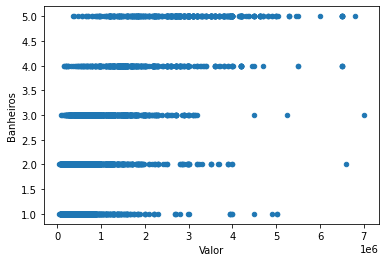

In [465]:
df.plot(kind = 'scatter' , x='Valor' , y='Banheiros')

<AxesSubplot:xlabel='Valor', ylabel='Area'>

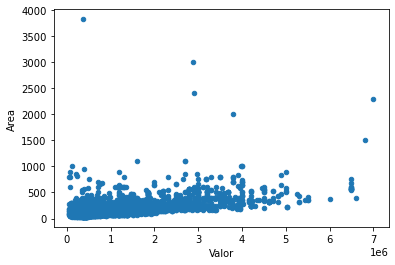

In [466]:
df.plot(kind = 'scatter' , x='Valor' , y='Area')

In [467]:
df.corr()

,Valor,Quartos,Banheiros,Vagas na garagem,Area,ValorPorM2,Area2
Valor,1.0000000000,0.6072659697,0.6755244057,0.6687552370,0.5843891843,0.5458681045,0.6772885755
Quartos,0.6072659697,1.0000000000,0.6683129703,0.5459910730,0.5343282981,0.1067691754,0.6873467056
Banheiros,0.6755244057,0.6683129703,1.0000000000,0.5513603953,0.5012295576,0.2445464166,0.6303129858
Vagas na garagem,0.6687552370,0.5459910730,0.5513603953,1.0000000000,0.4821481162,0.3325897962,0.5689178060
Area,0.5843891843,0.5343282981,0.5012295576,0.4821481162,1.0000000000,-0.0960002981,0.9415555932
ValorPorM2,0.5458681045,0.1067691754,0.2445464166,0.3325897962,-0.0960002981,1.0000000000,-0.0800187018
Area2,0.6772885755,0.6873467056,0.6303129858,0.5689178060,0.9415555932,-0.0800187018,1.0000000000


In [468]:
df.drop('ValorPorM2', axis = 1 , inplace =True)

# Modelagem

### Pre Processamento

In [469]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [470]:
df['Banheiro Por Quartos'] = df['Banheiros'] / df['Quartos']
#df['Area Por Quartos'] = df['Area'] / df['Quartos']

In [471]:
x_train, x_test, y_train ,y_test = train_test_split(df.drop('Valor', axis=1), df['Valor'], test_size= 0.2 , random_state=19)

#### Dummy categories

In [472]:
encoderCategoria = OneHotEncoder()

In [473]:
categories = encoderCategoria.fit_transform(x_train[['Categoria']])

In [474]:
categories = pd.DataFrame(categories.toarray(), columns = encoderCategoria.get_feature_names_out(), index = x_train.index)

In [475]:
x_train = x_train.join(categories).drop('Categoria', axis= 1)

In [476]:
encoderRegiao = OneHotEncoder()

In [477]:
regiao = encoderRegiao.fit_transform(x_train[['Regiao']])

In [478]:
regiao = pd.DataFrame(regiao.toarray(), columns= encoderRegiao.get_feature_names_out(), index= x_train.index)

In [479]:
x_train = x_train.join(regiao).drop('Regiao', axis = 1)

In [480]:
encoderTipo = OneHotEncoder()

In [481]:
tipo = encoderTipo.fit_transform(x_train[['TipoClasse']])

In [482]:
tipo = pd.DataFrame(tipo.toarray() , columns= encoderTipo.get_feature_names_out(), index = x_train.index)

In [483]:
x_train = x_train.join(tipo).drop('TipoClasse', axis = 1)

#### Normalizacao

In [484]:
from sklearn.preprocessing import StandardScaler

In [485]:
norm = StandardScaler()

In [486]:
x_train['Area'] = norm.fit_transform(x_train[['Area']])

### Modelo

<AxesSubplot:>

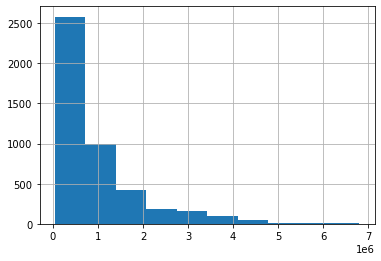

In [487]:
y_train.hist()

In [488]:
y_train = np.log2(y_train)

<AxesSubplot:>

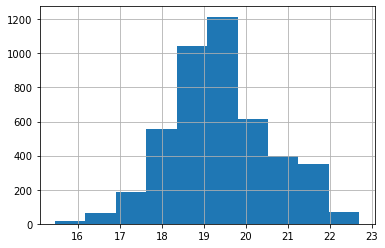

In [489]:
y_train.hist()

In [490]:
x_train = x_train.select_dtypes(include = np.number)

In [491]:
from sklearn.linear_model import LinearRegression

In [492]:
regressao = LinearRegression()

In [493]:
regressao.fit(x_train, y_train)

LinearRegression()

In [494]:
regressao.score(x_train, y_train)

0.7656741694523388

<AxesSubplot:xlabel='Valor', ylabel='Quartos'>

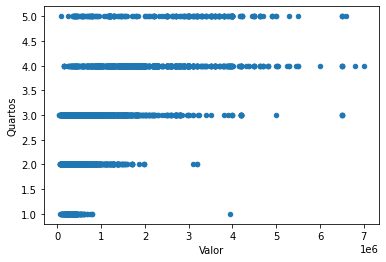

In [496]:
df.plot(kind = 'scatter' , x='Valor' , y='Quartos')

In [497]:
df.groupby('Quartos').mean()

,Valor,Banheiros,Vagas na garagem,Area,Area2,Banheiro Por Quartos
Quartos,,,,,,
1,"344,279.0122699387",1.0552147239,0.9325153374,70.8773006135,7.1668153186,1.0552147239
2,"484,519.3548972189",1.6390568319,1.1559854897,80.2351874244,8.7616330488,0.8195284160
3,"775,296.7878302642",2.2634107286,1.6461168935,125.7790232186,10.8962189326,0.7544702429
4,"1,950,776.8995305165",3.6018779343,2.6328638498,239.3887323944,14.9954794400,0.9004694836
5,"2,485,620.6931818184",4.2575757576,2.9659090909,433.3409090909,20.2631055027,0.8515151515


#### Validação

In [498]:
categories = encoderCategoria.transform(x_test[['Categoria']])

In [499]:
categories = pd.DataFrame(categories.toarray(), columns= encoderCategoria.get_feature_names_out(), index = x_test.index)

In [500]:
x_test = x_test.join(categories).drop('Categoria', axis = 1)

In [501]:
regioes = pd.DataFrame(encoderRegiao.transform(x_test[['Regiao']]).toarray() , columns = encoderRegiao.get_feature_names_out(), index =x_test.index)

In [502]:
x_test = x_test.join(regioes).drop('Regiao', axis =1)

In [503]:
tipo = pd.DataFrame(encoderTipo.transform(x_test[['TipoClasse']]).toarray() , columns = encoderTipo.get_feature_names_out(), index =x_test.index)

In [504]:
x_test = x_test.join(tipo).drop(['Tipo','TipoClasse'], axis =1)

In [505]:
x_test['Area'] = norm.transform(x_test[['Area']])

In [506]:
x_test = x_test.select_dtypes(include = np.number)
y_test = np.log2(y_test)

In [507]:
regressao.score(x_test, y_test)

0.7620480618798642

In [508]:
from sklearn.model_selection import cross_val_score

In [509]:
testes = cross_val_score(regressao , x_train, y_train, cv = 100)

In [510]:
[testes.mean()*100, testes.std()*100]

[75.50293745734864, 7.476406361012636]

In [511]:
pd.Series(regressao.coef_  , index = x_train.columns).sort_values(ascending= False)

Regiao_Zona Leste         0.9896420806
Regiao_Jardim da Penha    0.7670185679
Regiao_Jardim Camburi     0.5835443218
Regiao_Jucutuquara        0.3128304199
Vagas na garagem          0.3008868115
Quartos                   0.2643700667
TipoClasse_Classe A       0.2182271064
Banheiro Por Quartos      0.2043632750
Categoria_Apartamentos    0.1945933202
Area2                     0.1426339752
Banheiros                 0.1010294079
Regiao_Zona Norte        -0.0632832809
Categoria_Casas          -0.1945933202
TipoClasse_Classe B      -0.2182271064
Area                     -0.2980971702
Regiao_Zona Sul          -0.3636122047
Regiao_Maruípe           -0.3767083805
Regiao_Santo Antônio     -0.3876570608
Regiao_Zona Oeste        -1.4617744633
dtype: float64

In [512]:
y_predict = regressao.predict(x_test)

In [513]:
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score

In [514]:
r2_score(y_test, y_predict)

0.7620480618798642

In [515]:
y_test

4793   20.4169953965
2839   17.6800298023
75     21.4169953965
2742   18.7795654759
111    18.0950673016
            ...     
6169   20.3100801926
4033   19.1456933747
192    20.6971033157
3107   18.8726748803
5563   20.6540345938
Name: Valor, Length: 1129, dtype: float64

In [516]:
y_predict2 = 2**y_predict

In [517]:
y_test2 = 2**y_test

In [518]:
r2_score(y_test2, y_predict2)

0.7121735605870149

In [519]:
x_test

,Quartos,Banheiros,Vagas na garagem,Area,Area2,Banheiro Por Quartos,Categoria_Apartamentos,Categoria_Casas,Regiao_Jardim Camburi,Regiao_Jardim da Penha,Regiao_Jucutuquara,Regiao_Maruípe,Regiao_Santo Antônio,Regiao_Zona Leste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sul,TipoClasse_Classe A,TipoClasse_Classe B
4793,4,4,3,0.1474118845,12.9614813968,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000
2839,2,1,1,-0.6007671190,7.8102496759,0.5000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
75,5,5,3,1.1892686275,17.8044938148,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000
2742,2,2,2,-0.2511507622,10.5356537529,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000
111,3,2,2,-0.2441584351,10.5830052443,0.6666666667,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,3,3,2,-0.1252888738,11.3578166916,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
4033,2,3,1,-0.5378361747,8.3666002653,1.5000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
192,4,5,2,1.2801688803,18.1659021246,1.2500000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
3107,4,3,1,0.3222200628,13.8924439894,0.7500000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000


In [520]:
median_absolute_error(y_test2, y_predict2) / y_test2.mean()

0.1508627600385308

In [521]:
y_predict2.mean()

891764.5945882989